## Timeline graph


In [315]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import os
# Import libraries for data visualization
import matplotlib.pyplot as plt

from mycolorpy import colorlist as mcp
# Slightly advanced library for data visualization            
import seaborn as sns    

# Import necessary modules
import geopandas as gpd



## Loading the data

In [316]:
# Importing damaged data
# dmg_roanu = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\housing damages sidr.xlsx', sheet_name= 'Roanu', dtype={
#     'District': 'string',
#     'District corrected': 'string',
#     'ID_adm': 'string',
#     'District Total Population 2007 est.': 'int64',
#     'Total Households': 'int64',
#     'Total Vulnerable Households': 'int64',
#     'Fully Damaged Households': 'int64',
#     'Partially Damaged Households': 'int64',
#     'Fully Damaged Vulnerable Households': 'int64',
#     'Partially Damaged Vulnerable Households': 'int64',
#     'Fully Damaged Non vulnerable Households': 'int64',
#     'Partially Damaged Non Vulnerable Households': 'int64'
# })





dmg_roanu = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone damages.xlsx', sheet_name= 'Roanu', dtype={
    'Name of District defaut': 'string',
    'District corrected': 'string',
    'ID_adm':'string',
    'No. Of Affected Upazilas': 'int64',
    'No. Of Affected Unions': 'int64',
    'affected area (km2)': 'int64',
    'Causality': 'int64',
    'Fully affected HH': 'string',
    'Partially affected HH': 'int64',
    'Affected HH': 'int64',
    'Fully affected people': 'string',
    'Partially affected people': 'int64',
    'Fully affected shelter': 'int64',
    'Partially affected shelter': 'int64'
})





dmg_komen = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone damages.xlsx', sheet_name= 'Komen', dtype={
    'Name of District defaut': 'string',
    'District corrected': 'string',
    'ID_adm':'string',
    'Affected HH': 'int64',
    'Affected people': 'int64',
    'Fully damaged houses': 'int64',
    'Partially damaged houses': 'int64'
})

dmg_mora = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone damages.xlsx', sheet_name= 'Mora', dtype={
    'Name of District defaut': 'string',
    'District corrected': 'string',
    'ID_adm':'string',
    'Number of fully damaged house': 'int64',
    'Number of partially damaged house': 'int64',
    'Total number of damaged house': 'int64',
    'Nbr affected people': 'int64'
})

# Importing the bangladesh raw map
bgd_adm = gpd.read_file(os.getcwd() + '\\input\\shapefile_data\\shapefile_zip\\BGD_adm\\BGD_adm2.shp')


In [317]:
path_roanu = pd.read_excel(os.getcwd() + '\\input\\disaster_data\\cyclone eye.xlsx', sheet_name= 'Roanu', dtype={
    'SEASON': 'string',
    'BASIN': 'string',
    'SUBBASIN':'string',
    'ISO_TIME': 'string',
    'NATURE': 'string',
    'LAT': 'float',
    'LON': 'float',
    'WMO WIND': 'float',
    'WMO PRES': 'float',
    'WHO AGENCY': 'string',
    'DIST2LAND': 'int64',
    'LANDFALL': 'float',
    'IFLAG': 'string',
    'USA AGENCY': 'string',
    'USA ATCF_ID':'string',
    'USA LAT':'float',
    'USA LON':'float',
    'USA STATUS':'string',
    'USA WIND':'float',
    'USA PRES':'float',
    'USA SSHS':'float',

    "USA R34":'string',	
    "USA R50":'string',	
    "USA POCI":'float',	
    'USA ROCI':'float',	
    'USA RMW':'float',	
    "NEWDELHI LAT":'float',	
    'NEWDELHI LON':'float',	
    'NEWDELHI GRADE':'string',	
    'NEWDELHI WIND':'float',
    'NEWDELHI PRES':'float',	
    'NEWDELHI CI':'float',	
    'NEWDELHI DP':'float',	
    'STORM SPEED':'float',	
    'STORM DIR':'int64'

})

In [318]:
df_events = pd.DataFrame({
    'date':[
        #'2011-11-01', 
        '2012-03-01',
        #'2015-01-01',
        '2015-06-01',
        #'2018-11-01',
        '2018-05-01',

        '2013-03-29',
        '2016-05-21',
        '2013-05-16',
        '2015-07-29',
        '2017-05-30',
        '2007-11-15',
        '2009-05-25'
    ],
    'Events':[
        #'First round start',
        'First',
        #'Second round start',
        'Second',
        #'Third round start',
        'Third',
        'No Name',
        'Roanu',
        'Mahasen',
        'Komen',
        'Mora',
        'Sidr',
        'Aila'],

    'Nbr_Affected':[

        np.NAN,
        np.NAN,
        np.NAN,
        25020,
        1203555,
        1498644,
        2600000,
        3300012,
        8978541,
        3935341
        ], 
        'Affected_district':[
            #'','','',
            '','','',
            'Natore, Naogaon',
            'Barisal, Noakhali, Lakshmipur, Chandpur, Cox’s Bazar, Bhola, Barguna, Patuakhali',
            'Patuakhali, Bhola, Barguna districts',
            'Cox’s Bazar, Chittagong, Noakhali, Feni, Bandarban, Patuakhali, Bhola, Barguna districts',
            'Swandip, Anwara, Lohogara, Bashkhali, Sitakunda, Mirsarai, Chandanaish, Karnaphuli Thana, Cohokoria, Teknaf, Moheshkhali, Kutubdia, Pekua, Ramu, Ukhiya, Shah Parir Dwip, Cox’s Bazar district, Rangamati district, Nikonchori, Bhola district, Khagrachhari, Feni, Noakhali',
            'Bagerhat, Khulna, Satkhira, Patuakhali, Barguna, Pirojpur, Barisal, Jhalokati, Bhola, Madaripur, Gopalganj, Shariatpur districts',
            'Khulna, Satkhira, Jessore, Bagerhat, Patuakhali, Bhola, Barisal, Barguna, Pirojpur, Jhalokati districts, Lakshmipur, Chittagong, Noakhali, Cox’s Bazar, Feni, Chandpur'],
            
            'type':[
                'Survey',
                'Survey',
                'Survey',
                'TCA',
                'TCA',
                'TCA',
                'TCA',
                'TCA',
                'TCO',
                'TCO'
            ]
})


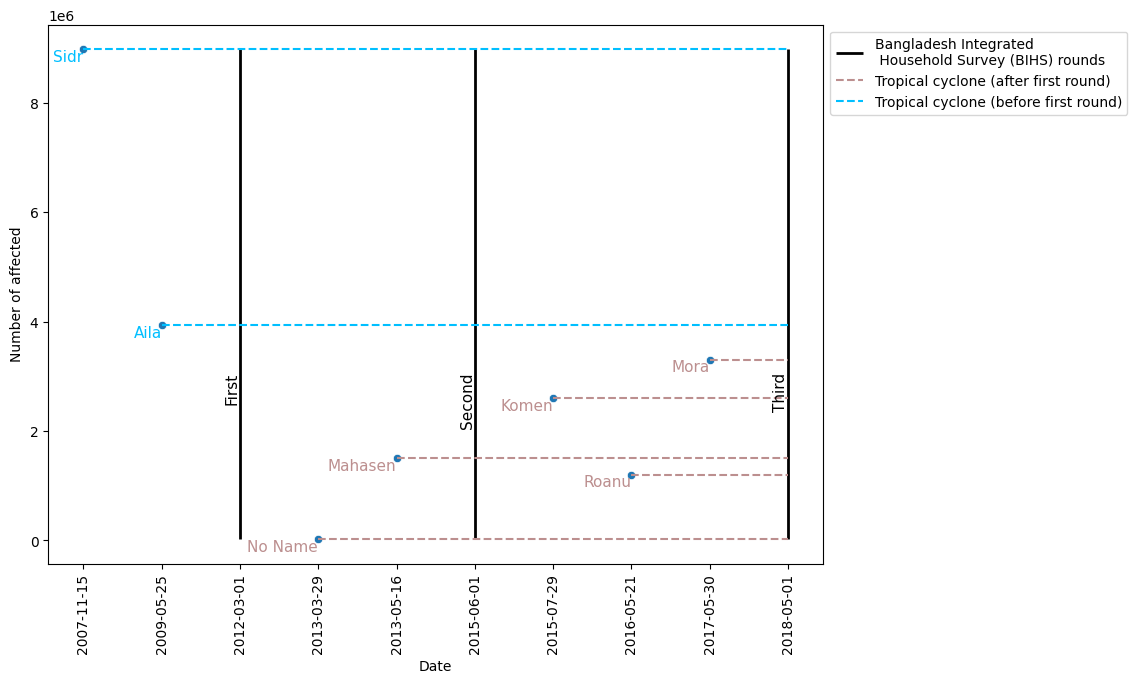

In [319]:

plt.figure(figsize=(10, 7))
# sort, then reset index
df_events = df_events.sort_values('date', ascending = True).reset_index(drop=True)

ax = sns.scatterplot(x=df_events.date, y=df_events.Nbr_Affected)
ax.set_xlabel("Date")
ax.set_ylabel("Number of affected")
ax.tick_params(axis='x', labelrotation = 90)

#plt.scatter(df.index, df.Nbr_Affected)
ax.vlines(x=df_events.loc[df_events['type']=='Survey'].date,ymin=df_events.Nbr_Affected.min(), ymax=df_events.Nbr_Affected.max(), color='k', ls='-', lw=2, label='Bangladesh Integrated \n Household Survey (BIHS) rounds')
for i in df_events.loc[df_events['type']=='Survey'].index.values:
    ax.text(x=df_events.loc[i,'date'],y=df_events.Nbr_Affected.mean(),s=df_events.loc[i,'Events'], color='k', ha='right', va='top', rotation=90, fontsize=11)

ax.hlines(y=df_events.loc[df_events['type']=='TCA'].Nbr_Affected,xmin=df_events.loc[df_events['type']=='TCA'].date,xmax=df_events.date.max(), color='rosybrown', ls='--', label='Tropical cyclone (after first round)')
for i in df_events.loc[df_events['type']=='TCA'].index.values:
    ax.text(x=df_events.loc[i,'date'],y=df_events.loc[i,'Nbr_Affected'],s=df_events.loc[i,'Events'], color='rosybrown', ha='right', va='top', rotation=0, fontsize=11)

ax.hlines(y=df_events.loc[df_events['type']=='TCO'].Nbr_Affected,xmin=df_events.loc[df_events['type']=='TCO'].date,xmax=df_events.date.max(), color='deepskyblue', ls='--', label='Tropical cyclone (before first round)')
for i in df_events.loc[df_events['type']=='TCO'].index.values:
    ax.text(x=df_events.loc[i,'date'],y=df_events.loc[i,'Nbr_Affected'],s=df_events.loc[i,'Events'], color='deepskyblue', ha='right', va='top', rotation=0, fontsize=11)

# # # place the legend outside
ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

# saving the file
filename = 'BIHS_rounds_and_date'
plt.savefig( os.getcwd() + '\\output\\img\\' + filename+'.jpeg')

### Plotting graph

In [320]:
# Creating the IDs for joining 
bgd_adm["ID"] = bgd_adm["ID_1"].astype("str") + bgd_adm["ID_2"].astype("str")
bgd_adm["ID"] = bgd_adm["ID"].astype("str")

nbr_affected_list = dmg_roanu["Affected people"].values.tolist() + dmg_komen["Affected people"].values.tolist() + dmg_mora["Affected people"].values.tolist()


In [321]:

quantiles = np.quantile(nbr_affected_list, [i * 0.25 for i in range(5)])
rounded_quantiles = [int(i) for i in np.around(quantiles, -1).tolist()]

qlabels = [
    '< '+ str(rounded_quantiles[1]), str(rounded_quantiles[1]) + ' - ' + str(rounded_quantiles[2]), str(rounded_quantiles[2]) + ' - ' + str(rounded_quantiles[3]), '> ' + str(rounded_quantiles[3]),
]

In [322]:
# Explicitly specifying the columns for joining
dmg_roanu = bgd_adm.merge(dmg_roanu, left_on='ID', right_on='ID_adm', how='left')
dmg_komen = bgd_adm.merge(dmg_komen, left_on='ID', right_on='ID_adm', how='left')
dmg_mora = bgd_adm.merge(dmg_mora, left_on='ID', right_on='ID_adm', how='left')

# Replace Nan by 0
dmg_roanu["Affected people"] = dmg_roanu["Affected people"].fillna(0)
dmg_komen["Affected people"] = dmg_komen["Affected people"].fillna(0)
dmg_mora["Affected people"] = dmg_mora["Affected people"].fillna(0)

# Create a new column for the categorical column mentioned above
dmg_roanu['Affected_people_quartile'] = pd.cut(dmg_roanu['Affected people'], bins=rounded_quantiles, labels=qlabels,  ordered=False, include_lowest=False)
dmg_komen['Affected_people_quartile'] = pd.cut(dmg_komen['Affected people'], bins=rounded_quantiles, labels=qlabels,  ordered=False, include_lowest=False)
dmg_mora['Affected_people_quartile'] = pd.cut(dmg_mora['Affected people'], bins=rounded_quantiles, labels=qlabels,  ordered=False, include_lowest=False)

# Sorting 
dmg_roanu.sort_values(by='Affected people', inplace=True, ascending=True)
dmg_komen.sort_values(by='Affected people', inplace=True, ascending=True)
dmg_mora.sort_values(by='Affected people', inplace=True, ascending=True)


In [323]:
path_roanu = gpd.GeoDataFrame(path_roanu, geometry=gpd.points_from_xy(path_roanu.LON, path_roanu.LAT), crs="EPSG:4326")


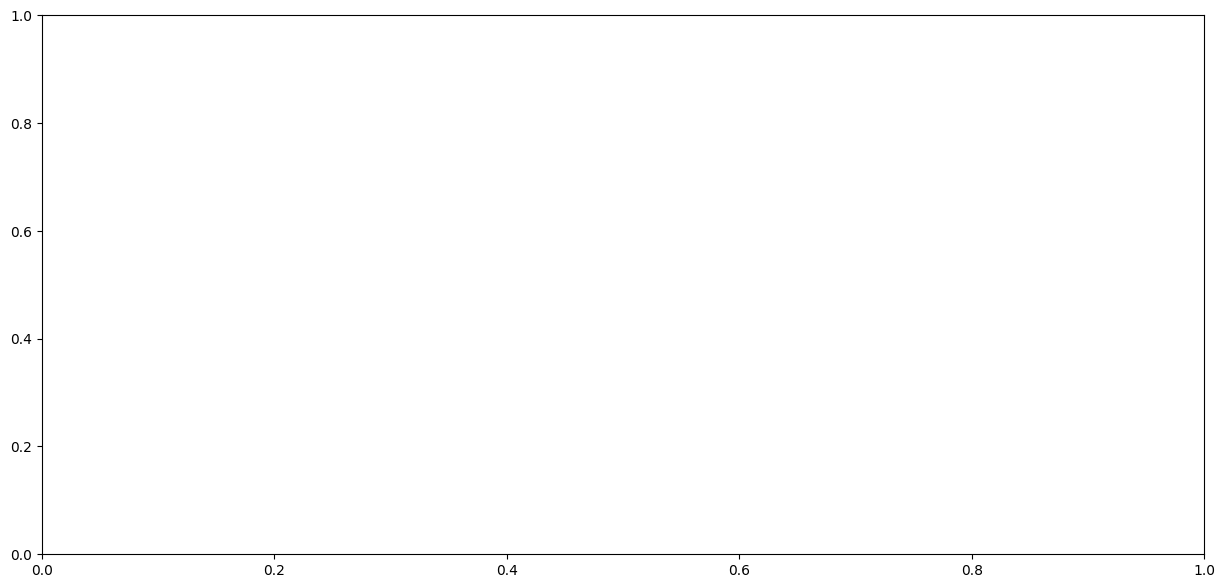

In [324]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)



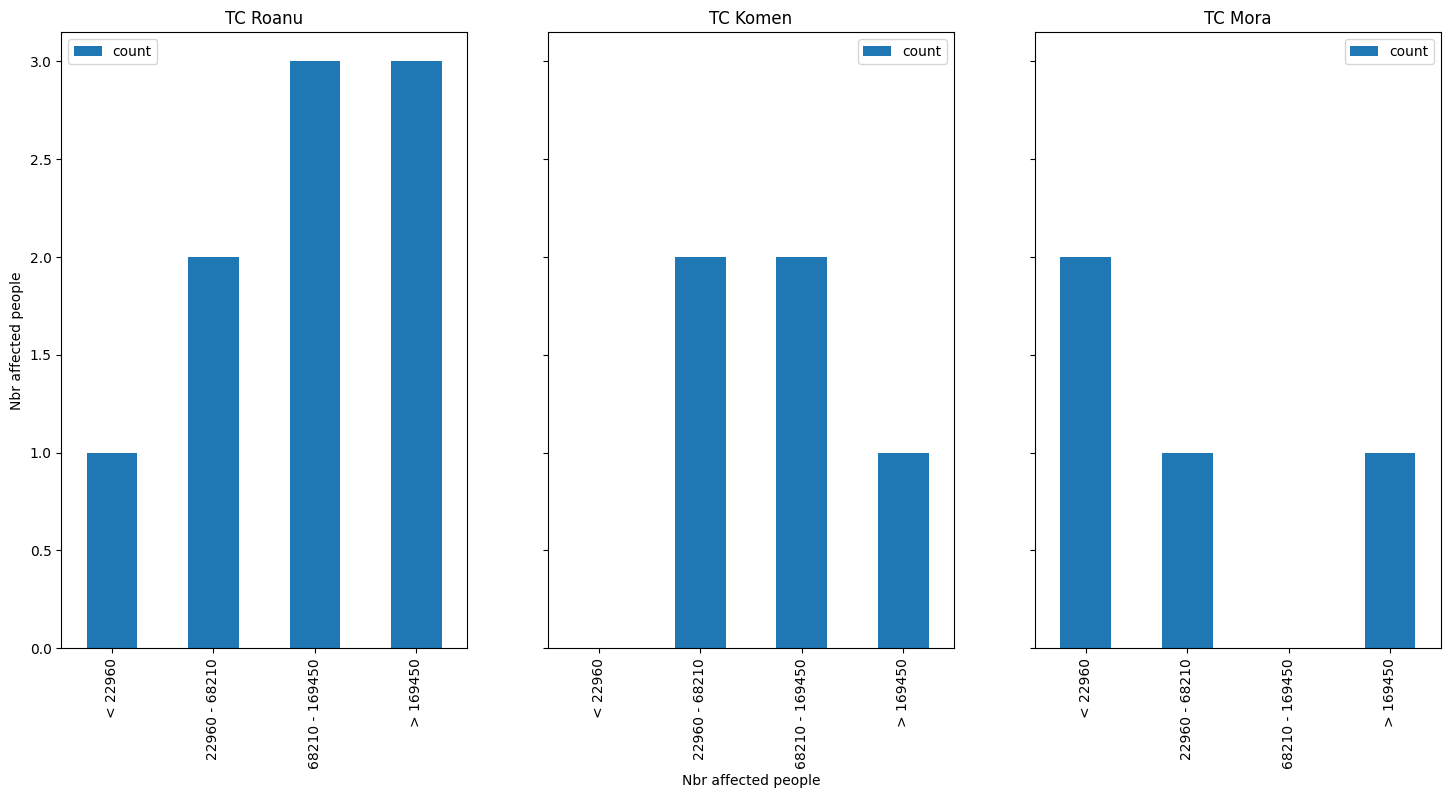

In [325]:
# np.quantile(nbr_affected_list,[i * 0.25 for i in range(4)]).tolist().around(0)
# np.quantile(nbr_affected_list,[i * 0.25 for i in range(4)]).tolist()
# Plotting the categorical data for checking
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(17.8,8),sharex=True, sharey=True)
dmg_roanu['Affected_people_quartile'].value_counts().sort_index().plot(kind='bar', xlabel='', ylabel='Nbr affected people', rot=45, legend=True, ax=ax[0])
dmg_komen['Affected_people_quartile'].value_counts().sort_index().plot(kind='bar', xlabel='Nbr affected people', ylabel='', rot=45, legend=True, ax=ax[1])
dmg_mora['Affected_people_quartile'].value_counts().sort_index().plot(kind='bar', xlabel='', ylabel='', rot=45, legend=True, ax=ax[2])

# fig.text(0.5, 0, 'Nbr affected people', ha='center')
# fig.text(0, 0.5, 'Nbr districts', va='center', rotation='vertical')

ax[0].tick_params(axis='x', labelrotation = 90)
ax[1].tick_params(axis='x', labelrotation = 90)
ax[2].tick_params(axis='x', labelrotation = 90)

ax[0].set_title("TC Roanu")
ax[1].set_title("TC Komen")
ax[2].set_title("TC Mora")



# Adjusting the sub-plots 
plt.subplots_adjust(right=0.9) 

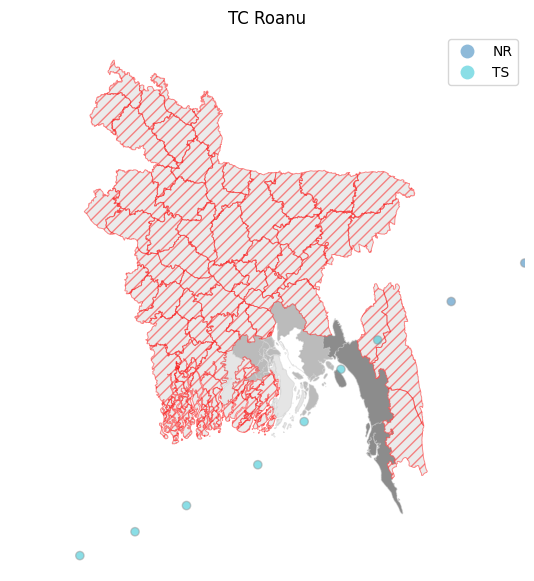

In [326]:


# Représentation graphique des regions du Bangladesh
## fig et ax représentent la base de la carte
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
#dmg_roanu.apply(lambda x: ax.annotate(text=x['NAME_2'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)
color_steps = plt.colormaps['Greys'].resampled(4) 

# bgd_plot=dmg_roanu.plot(ax=ax, lw=0.7, alpha=0.45,column="Affected_people_quartile", scheme='User_Defined', missing_kwds=dict(color='white'), classification_kwds=dict(bins=rounded_quantiles), cmap=cmap, edgecolor='0.8', legend=True, legend_kwds={"loc": "upper left", "bbox_to_anchor": (0, 0.15), 
#                         'markerscale':1.29,'title_fontsize':'medium', 'fontsize':'small', "interval": False, "title":"Affected hh","title_fontsize":"medium"})

bgd_plot = dmg_roanu.plot(ax=ax, lw=0.7, alpha=0.45,column="Affected_people_quartile",categorical=True, missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "No data"}, cmap=color_steps, edgecolor='0.8', legend=True)
path_roanu.plot(ax=ax, column="NATURE", facecolor='#cccccc', edgecolor='#969696', alpha=0.5, legend=True,categorical=True)

# , legend=True, legend_kwds={"loc": "upper left", "bbox_to_anchor": (0, 0.15), 
#                         'markerscale':1.29,'title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"}
#, legend=True, linewidth=1

# dmg_komen.plot(ax=ax[1], lw=0.7, alpha=0.45,column="Affected_people_quartile", missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"}, cmap=color_steps, edgecolor='0.8', legend=True, legend_kwds={"loc": "upper left", "bbox_to_anchor": (0, 0.15), 
#                         'markerscale':1.29,'title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"})

# dmg_mora.plot(ax=ax[2], lw=0.7, alpha=0.45,column="Affected_people_quartile", missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"}, cmap=color_steps, edgecolor='0.8', legend=True, legend_kwds={"loc": "upper left", "bbox_to_anchor": (0, 0.15), 
#                         'markerscale':1.29,'title_fontsize':'medium', 'fontsize':'small', "title_fontsize":"medium"})

# Sets figure limits
ax.set_xlim(87, 94);
ax.set_ylim(20, 27);

# Sans axe 
ax.axis('off')
# ax[1].axis('off')
# ax[2].axis('off')
# using set_facecolor() method
ax.set_facecolor("white")
# ax[1].set_facecolor("white")
# ax[2].set_facecolor("white")
# Set title and legend title

ax.title.set_text("TC Roanu")
# ax[1].title.set_text("TC Komen")
# ax[2].title.set_text("TC Mora")

# Removes ticks and lat/lon labels
ax.tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)



# Rajouter les coordonnées GPS des points sur la carte
#csm = path_roanu.plot(ax=bgd_plot, column="NATURE", facecolor='#cccccc', edgecolor='#969696', alpha=0.5, legend=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3280\3951698943.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ctype, data in dmg_roanu.groupby('Affected_people_quartile'):


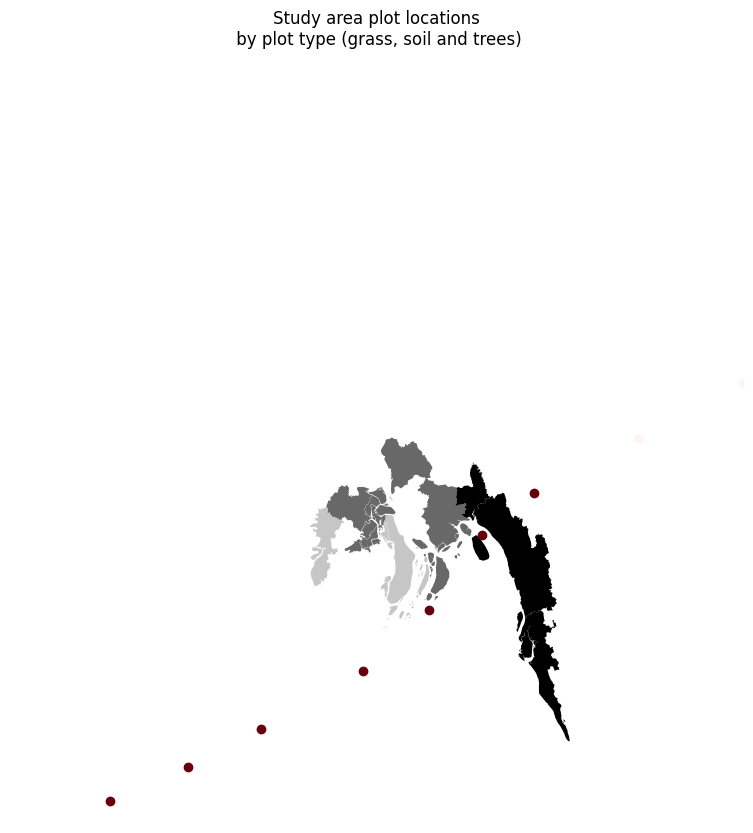

In [349]:
distrPalette = dict(zip(qlabels, mcp.gen_color(cmap="Greys",n=len(qlabels))))
pathPalette = dict(zip(["NR","TS"], mcp.gen_color(cmap="Reds",n=2)))

fig, ax = plt.subplots(figsize=(10, 10))

for ctype, data in dmg_roanu.groupby('Affected_people_quartile'):
    color = distrPalette[ctype]
    label = ctype
    data.plot(color=color,ax=ax,label=label)
    
for ctype, data in path_roanu.groupby('NATURE'):
    color = pathPalette[ctype]
    label = ctype    
    data.plot(color=color,ax=ax,label=label)

# Sets figure limits
ax.set_xlim(87, 94);
ax.set_ylim(20, 27);
ax.set(title='Study area plot locations\n by plot type (grass, soil and trees)')


ax.legend(fontsize=15,frameon=False,loc=('lower right'),title="LEGEND")

ax.set_axis_off()
plt.show()

In [344]:

pathPalette
#color_steps=color_steps.__init__
#hexes = [pltcol.colors.rgb2hex(x) for x in color_steps._lut]


{'NR': '#f7fcf5', 'TS': '#00441b'}